# Data Science Programming Project: Weekly Fuel Prices Time Series Dataset

This project will take the Weekly Petrol and Diesel Prices Time Series data published by Department for Energy Security and Net Zero retrieved from https://www.data.gov.uk/dataset/21db6396-3daf-4d90-8b3f-054995256018/petrol-and-diesel-prices. 
I will analyse this dataset to answer the following questions: 
1. Do diesel and petrol prices follow similar trends or do they have separate trajectories?
   To assess this, I will compare the distributions of petrol and diesel prices and their relationship to each other. I will also map the differences between the two prices over time and see if there is a consistent price difference between them and if not, suggest reasons for this supported with evidence.
2. What have fuel price changes been driven by?
   To assess this, I will first look into any seasonal trends in the data and the genreal distributions. Secondly, I will asses the     relationships between the variables in the dataset and use a sumplemetary dataset to include crude oil imports for analysis of it's impact on fuel prices. Lastly, I will distinguish periods of excessive volatility and determine possible causes or highlight further information that may be worth investigating.
   
To answer these questions, a deep and clear understanding of the dataset is necessary. We must be familiar with what the data represents and where it comes from. 

## The Dataset
The dataset title is '9 June 2003 - 2 December 2024'. 

The download link is http://localhost:8889/files/PROJECT/weekly_fuel_prices.csv?_xsrf=2%7C4d9e143b%7C2815f71a20514b55e7889d4e65759ff7%7C1731947822 

The path is PROJECT/weekly_fuel_prices.csv. 

The dataset documents petrol and diesel prices each week starting on 09/06/2003 up until 25/11/2024. The recorded variables include:
The date that the entry was recorded
- ULSP (Ultra Low Sulphur Unleaded Petrol): Pump price (p/litre)
- ULSP: Difference from the previous week (p/litre)
- ULSP: Difference from the previous year
- Duty rate USLP (p/litre)
- VAT (%rate) ULSP
- ULSD (Ultra Low Sulphur Diesel): Pump price (p/litre)
- ULSD: Difference from the presious week (p/litre)
- ULSD: Difference from the previous year (p/litre)
- Duty rate USLD (p/litre)
- VAT (%rate) ULSD

In the supplementary documentation, it states that six companies take part in the survey, four oil companies and two supermarkets and it is estmated that the sample currently covers 60% of the total market volume sold. Weighted average prices are calculated from the weekly prices reported by the companies based on annual sales volume and these averages are the entries in this dataset. On the occasion they are unable to get a value from a company then an estimate is calculate based on market data. 

This dataset was selected for this project for the following reasons:

1. RELEVANCY - The last entry was in November of this year, making it relevant to current affairs and a valuable dataset to draw insights from.
2. AVAILABILITY - It was readily and openly available to me on the gov.uk website in the form of an Excel file making it compatible with Jupyter notebooks for my project.
3. MANAGEABLE - The dataset isn't too large and has a manageable number of columns as well as minimal noise as missing data has either been normalised already or justified in the supplementary documentation so I can deal with them accordingly.
4. SCOPE - The data dates all the way back to 2003 which will allow for long-term insights.
5. INTEREST - The data is generally interesting and understandble as fuel prices is something that is applicable and familiar to most people. Also, historical events such as the 2008 recession and the COVID-19 pandemic occured within the scope of the dataset. It will be interesting to investigate fuel price volatiltiy during these historically relevant times.
6. ANALYSIS OPPORTUNITY - The data has a lot of analysis opportunities, notably the opportunity for comparison between years and within years to create long-term insights as well as compare cyclical yearly patterns. The inclusion of duty rate and VAT also allows for analysis of government policy and it's impact on consumer prices. This data set also allows for inclusion of supplementary datasets for broader analysis. 

Now that an understanding of the dataset has been achieved, I will import and familiarise myself with the data. 

In [223]:
#import libraries needed 
import pandas as pd 
import numpy as np
#libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset into a DataFrame

In [226]:
#import and load data into a data frame 
df = pd.read_csv('weekly_fuel_prices.csv')

In [228]:
"""
create a display of a subset of the data 
to understand how it has been imported and familiarise youself with the structure of it 
"""
df.head(20)

,Weekly Prices time series (from 2003),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,ULSP = Ultra low sulphur unleaded petrol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ULSD = Ultra low sulphur diesel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Duty rates over time can be found in the duty ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Empty cells represent weeks where differences ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,An 'r' next to a value indicates it has been r...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Freeze panes are turned on. To turn off freeze...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Date,ULSP: Pump price (p/litre),ULSP: Diff on previous WEEK (p/litre),ULSP: Diff on previous YEAR (p/litre),Duty rate ULSP (p/litre),VAT (% rate) ULSP,ULSD: Pump price (p/litre),ULSD: Diff on previous WEEK (p/litre),ULSD: Diff on previous YEAR (p/litre),Duty rate ULSD (p/litre),VAT (% rate) ULSD
7,09/06/2003,74.59,NaN,NaN,45.82,17.50,76.77,NaN,NaN,45.82,17.50
8,16/06/2003,74.47,-0.1,NaN,45.82,17.50,76.69,-0.1,NaN,45.82,17.50
9,23/06/2003,74.42,0.0,NaN,45.82,17.50,76.62,-0.1,NaN,45.82,17.50


Importing Issue: 

In the original Excel file there is supplementary information at the top of the table. Pandas has imported this and included it in the dataframe so we need to deal with this before anything else. The actual data set starts at index 7 and the column titles are at index 6 so I will create a copy that slices the dataset to remove the first irrelevant rows and rename the columns

In [231]:
#use slicing to remove unwanted rows and start the dataset from index 7 
df = df.iloc[7:,:].copy()
#while slicing we need to change column names to match the intended column names of the dataset 
#but I also changed them slightly make them more readible and stright-forward
df.columns = ['date', 'petrol_pump_price', 
              'petrol_difference_from_previous_week', 
              'petrol_difference_from_previous_year','duty_rate_petrol',
              'vat_petrol', 'diesel_pump_price', 'diesel_difference_from_previous_week',
              'diesel_difference_from_previous_year', 'duty_rate_diesel', 'vat_diesel']

I'm going to drop the columns with differences in them because as I manipulate the data they will need updating so to be safe and avoid complexity I will remove them now and add them again later if I need them for analysis. 

In [234]:
#remove difference columns 
df = df.drop(['petrol_difference_from_previous_week', 
              'petrol_difference_from_previous_year','diesel_difference_from_previous_week',
              'diesel_difference_from_previous_year'], axis = 1)

Finally need to reset the index so that it indexes the intended values not the supplemetnary data from before.

In [237]:
#reset indexes
df = df.reset_index(drop = True)

In [239]:
#create another display to understand the undated structure 
df.head(20)

,date,petrol_pump_price,duty_rate_petrol,vat_petrol,diesel_pump_price,duty_rate_diesel,vat_diesel
0,09/06/2003,74.59,45.82,17.50,76.77,45.82,17.50
1,16/06/2003,74.47,45.82,17.50,76.69,45.82,17.50
2,23/06/2003,74.42,45.82,17.50,76.62,45.82,17.50
3,30/06/2003,74.35,45.82,17.50,76.51,45.82,17.50
4,07/07/2003,74.28,45.82,17.50,76.46,45.82,17.50
5,14/07/2003,74.21,45.82,17.50,76.41,45.82,17.50
6,21/07/2003,75.07,45.82,17.50,76.90,45.82,17.50
7,28/07/2003,75.10,45.82,17.50,76.86,45.82,17.50
8,04/08/2003,75.12,45.82,17.50,76.81,45.82,17.50
9,11/08/2003,75.44,45.82,17.50,77.08,45.82,17.50


Upon inspection, it seems that the VAT and Duty Rate columns are exactly identical for both Petrol and Diesel. If this is the case, I will combine these into one column for convenience. First, I will deal with the null values and then check if VAT and Duty Rate are equivalent after as if I check now the null values may interfere.

# Dealing with Missing Values 

Now I will check for missing values and deal with them according using slicing to remove null rows or columns or using dropna() to remove the values and fillna() to impute the values. 

In [244]:
#check for null values 
df.isnull()

,date,petrol_pump_price,duty_rate_petrol,vat_petrol,diesel_pump_price,duty_rate_diesel,vat_diesel
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1120,False,False,False,False,False,False,False
1121,True,True,True,True,True,True,True
1122,True,True,True,True,True,True,True
1123,True,True,True,True,True,True,True


In [246]:
#clearly there are many nulls so to get a better idea of where they are sum them 
df.isnull().sum()

date                 4
petrol_pump_price    4
duty_rate_petrol     4
vat_petrol           4
diesel_pump_price    4
duty_rate_diesel     4
vat_diesel           3
dtype: int64

It appears as though the last four rows are all null so lets just confirm this using tail. 

In [249]:
df.tail(4)

,date,petrol_pump_price,duty_rate_petrol,vat_petrol,diesel_pump_price,duty_rate_diesel,vat_diesel
1121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1123,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1124,NaN,NaN,NaN,NaN,NaN,NaN,


In [251]:
#confirmed so we can get rid of the last 4 rows 
df = df.iloc[:-4].copy()

In [253]:
#check for missing values again 
df.isnull().sum()

date                 0
petrol_pump_price    0
duty_rate_petrol     0
vat_petrol           0
diesel_pump_price    0
duty_rate_diesel     0
vat_diesel           0
dtype: int64

Now we can see there are no missing values so they have been successfully dealt with. 

Now the missing values have been dealt with I will return to my previous inquiry of the VAT and Duty Rate columns being equal.

In [257]:
#Check if the VAT columns are equal 
VAT_are_equal = df['vat_petrol'] == df['vat_diesel']
VAT_are_equal.all() == True

True

In [259]:
#Check if the Duty Rate columns are equal 
Duty_are_equal = df['duty_rate_petrol'] == df['duty_rate_diesel']
Duty_are_equal.all() == True 

True

This confirms both columns are equal so we can drop one of the columns and rename the remaining columns to be simply 'VAT' and 'Duty Rate'.

In [262]:
#Remove VAT and Duty Rate coplumns for petrol 
df = df.drop(['vat_petrol', 'duty_rate_petrol'], axis = 1)
#Rename diesel columns to be generic 
df = df.rename(columns={'duty_rate_diesel': 'duty_rate', 'vat_diesel': 'vat'})
#Now the columns aren't unecessarily repeated
df = df.reset_index(drop = True)

In [264]:
df.head()

,date,petrol_pump_price,diesel_pump_price,duty_rate,vat
0,09/06/2003,74.59,76.77,45.82,17.50
1,16/06/2003,74.47,76.69,45.82,17.50
2,23/06/2003,74.42,76.62,45.82,17.50
3,30/06/2003,74.35,76.51,45.82,17.50
4,07/07/2003,74.28,76.46,45.82,17.50


## Checking Dtypes

Now the missing values and column selection has been dealt with I need to investigate the data types of the columns in the dataset.

In [268]:
#Check the data types of the columns
df.dtypes

date                 object
petrol_pump_price    object
diesel_pump_price    object
duty_rate            object
vat                  object
dtype: object

The data has been interpreted by Pandas as having dtype 'object'. It is likely that the inclusion of the supplemetary information from before that we rectified, prevented the columns from being interpreted as integers, datetimes or floats. This is not admirable as we will not be able to do mathematical operations and aggregations during analysis. We want the columns the have integer or float dtypes and the date column we can use as DateTime objects.

In [271]:
#Remove any potential whitespace in the Date entries
df['date'] = df['date'].str.strip()
#Change the 'Date' column to be datetime dtype
df['date'] = pd.to_datetime(df['date'].str.strip(), format = '%d/%m/%Y', errors = 'coerce')

Date column has been dealt with, now attend to the other columns.

In [274]:
#Change all the columns except for Date using the to_numeric function to correct the dtypes. 
df[['petrol_pump_price','diesel_pump_price', 'duty_rate', 'vat']]= df[['petrol_pump_price','diesel_pump_price', 'duty_rate', 'vat']].apply(pd.to_numeric, errors = 'coerce')

In [276]:
#check the updated dtypes
df.dtypes

date                 datetime64[ns]
petrol_pump_price           float64
diesel_pump_price           float64
duty_rate                   float64
vat                         float64
dtype: object

The dtypes are now suitable and the data has an appropriate structure so now we can identify and handle any outliers.

## Handling Outliers

I am going to plot a boxplot for each variable to identify outliers for them.

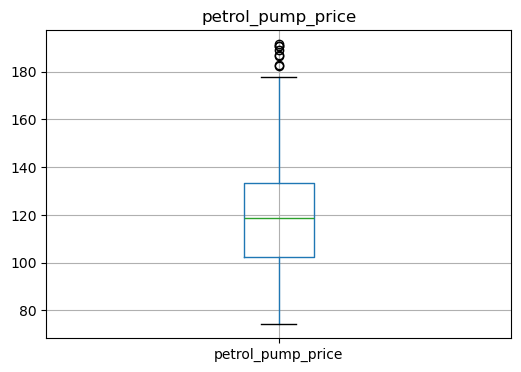

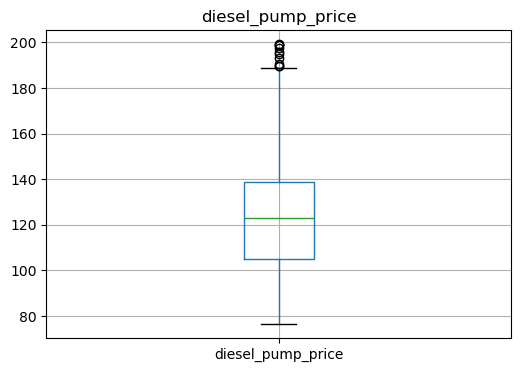

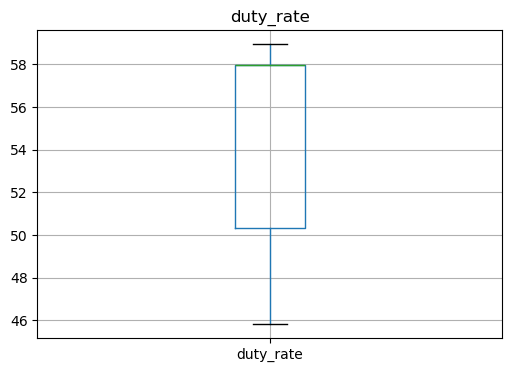

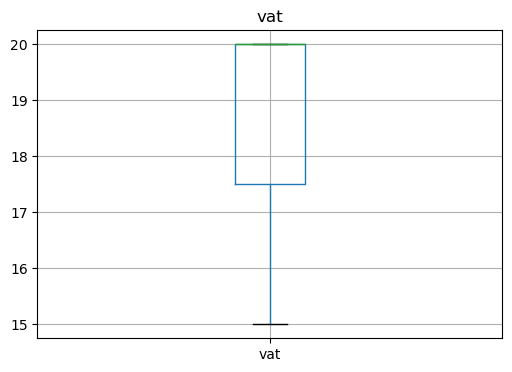

In [281]:
# List of variables
vars = ['petrol_pump_price', 'diesel_pump_price', 'duty_rate', 'vat']

# Visualize outliers for the dataset 
for col in vars:
    plt.figure(figsize=(6, 4))
    df.boxplot(column=col)
    plt.title(col)
    plt.show()

The box plots show that there are obvious outliers to the dataset in petrol_pump_price and diesel_pump_price columns. However, we have to think about this rationally. In the case of this dataset I deem it inappropriate to identify outliers using the data derived from the entire dataset. The data spans from 2003 to 2024 with weekly entries and it is expected that fuel prices may have changed significantly since 2003. To prevent valid values being dismissed as outliers, I will determine outliers for each year using the mean and standard deviation calculated from the data in that year. 

To find outliers on a yearly basis, I will first create some functions that will help me find them. 

In [285]:
#make a new column called Year that contains only the year that the entry was recorded with dtype int64
df['year'] = df['date'].dt.year

In [287]:
#create a function that identifies the outliers in a dataframe given a column name 
def identify_outliers(year_df, column): #takes a dataframe containing entries for a specific year and the column name 
    upper_limit = year_df[column].mean() + 3 * year_df[column].std() #calculates upper limit 
    lower_limit = year_df[column].mean() - 3 * year_df[column].std() #calculates lower limit
    outliers = [] #create emtpy list where the outliers will go
    for value in year_df[column]: #iterates through the values in the selected column of the year-specific DataFrame
            if (value > upper_limit) | (value < lower_limit): 
                outliers.append(value) #adds the iterable value to the outliers list if it's outside of the range of the upper and lower limits
    return outliers #returns the list of outliers 

In [289]:
#create a function that creates a new DataFrame containing only the data from a specified year 
def group_years(year): #takes the intended year as an argument
    year_df = df[df['year'] == year]  #creates a new dataframe that only contains entried from the selected year
    return year_df

Now I will use the functions to find out what the ouliers are in the 'Petrol Pump Price' column.

In [292]:
for year in df['year'].unique(): #iterates through the unique values in the 'Year' column - iterates through each year in the dataset
    year_df = group_years(year) #saves the year-specific data frame to a year_df variable 
    outlier = identify_outliers(year_df, 'petrol_pump_price') #saves a list of the outliers specific to that year and the specified column  to an outlier variable and proceeds to print them.
    print (f"The outliers for year {year} are {outlier}")

The outliers for year 2003 are []
The outliers for year 2004 are []
The outliers for year 2005 are []
The outliers for year 2006 are []
The outliers for year 2007 are []
The outliers for year 2008 are []
The outliers for year 2009 are []
The outliers for year 2010 are []
The outliers for year 2011 are [124.85]
The outliers for year 2012 are []
The outliers for year 2013 are []
The outliers for year 2014 are [113.66, 113.16]
The outliers for year 2015 are []
The outliers for year 2016 are []
The outliers for year 2017 are []
The outliers for year 2018 are []
The outliers for year 2019 are []
The outliers for year 2020 are []
The outliers for year 2021 are []
The outliers for year 2022 are []
The outliers for year 2023 are []
The outliers for year 2024 are []


Now, I will use the functions to find out what the outliers are in the 'Diesel Petrol Pump' column.

In [295]:
for year in df['year'].unique(): #iterates through the unique values in the 'Year' column - iterates through each year in the dataset
    year_df = group_years(year) #saves the year-specific data frame to a year_df variable 
    outlier = identify_outliers(year_df, 'diesel_pump_price') #saves a list of the outliers specific to that year and the specified column  to an outlier variable and proceeds to print them.
    print (f"The outliers for year {year} are {outlier}")

The outliers for year 2003 are []
The outliers for year 2004 are []
The outliers for year 2005 are []
The outliers for year 2006 are []
The outliers for year 2007 are []
The outliers for year 2008 are []
The outliers for year 2009 are []
The outliers for year 2010 are []
The outliers for year 2011 are [129.11]
The outliers for year 2012 are []
The outliers for year 2013 are []
The outliers for year 2014 are []
The outliers for year 2015 are []
The outliers for year 2016 are []
The outliers for year 2017 are []
The outliers for year 2018 are []
The outliers for year 2019 are []
The outliers for year 2020 are []
The outliers for year 2021 are []
The outliers for year 2022 are []
The outliers for year 2023 are []
The outliers for year 2024 are []


From these calculations, we can infer that the outliers in the Petrol Pump Prices are 124.85 in 2011, and 113.66 and 113.16 in 2014. Additionally, the only outlier in the Diesel Pump Prices is 129.11 in 2011.

VAT and Duty Rate are government fixed values and are unlikely to need changing or normalising as outliers however, I will now conduct outlier inspections on the Duty Rate and VAT columns, for safety and investigate outliers in these columns to determine whether they are indeed outliers or as expected.

In [299]:
#find the outliers for 'Duty Rate'
for year in df['year'].unique(): #iterates through the unique values in the 'Year' column - iterates through each year in the dataset
    year_df = group_years(year) #saves the year-specific data frame to a year_df variable 
    outlier = identify_outliers(year_df, 'duty_rate') #saves a list of the outliers specific to that year and the specified column  to an outlier variable and proceeds to print them.
    print (f"The outliers for year {year} are {outlier}")

The outliers for year 2003 are []
The outliers for year 2004 are []
The outliers for year 2005 are []
The outliers for year 2006 are [48.35, 48.35, 48.35]
The outliers for year 2007 are []
The outliers for year 2008 are [52.35, 52.35, 52.35, 52.35, 52.35]
The outliers for year 2009 are []
The outliers for year 2010 are []
The outliers for year 2011 are []
The outliers for year 2012 are []
The outliers for year 2013 are []
The outliers for year 2014 are []
The outliers for year 2015 are []
The outliers for year 2016 are []
The outliers for year 2017 are []
The outliers for year 2018 are []
The outliers for year 2019 are []
The outliers for year 2020 are []
The outliers for year 2021 are []
The outliers for year 2022 are []
The outliers for year 2023 are []
The outliers for year 2024 are []


In [301]:
#investigate the first "outlier" duty rate (48.35 in 2006) by stacking the 2006 and 2007 duty rates to determine whether it is an outlier
duty_rate_06 = df.loc[df['year'] == 2006, 'duty_rate']
duty_rate_07 = df.loc[df['year'] == 2007, 'duty_rate']
pd.concat([duty_rate_06, duty_rate_07], axis=0).head(60)

134    47.10
135    47.10
136    47.10
137    47.10
138    47.10
139    47.10
140    47.10
141    47.10
142    47.10
143    47.10
144    47.10
145    47.10
146    47.10
147    47.10
148    47.10
149    47.10
150    47.10
151    47.10
152    47.10
153    47.10
154    47.10
155    47.10
156    47.10
157    47.10
158    47.10
159    47.10
160    47.10
161    47.10
162    47.10
163    47.10
164    47.10
165    47.10
166    47.10
167    47.10
168    47.10
169    47.10
170    47.10
171    47.10
172    47.10
173    47.10
174    47.10
175    47.10
176    47.10
177    47.10
178    47.10
179    47.10
180    47.10
181    47.10
182    47.10
183    48.35
184    48.35
185    48.35
186    48.35
187    48.35
188    48.35
189    48.35
190    48.35
191    48.35
192    48.35
193    48.35
Name: duty_rate, dtype: float64

We can observe that 48.35 is not an outlier, it is just the sustained increased value so we need not normalise it.

In [304]:
#now investigate the other outlier (52.35 in 2008) in the same way 
duty_rate_08 = df.loc[df['year'] == 2008, 'duty_rate']
duty_rate_09 = df.loc[df['year'] == 2009, 'duty_rate']
pd.concat([duty_rate_08, duty_rate_09], axis=0).head(60)

239    50.35
240    50.35
241    50.35
242    50.35
243    50.35
244    50.35
245    50.35
246    50.35
247    50.35
248    50.35
249    50.35
250    50.35
251    50.35
252    50.35
253    50.35
254    50.35
255    50.35
256    50.35
257    50.35
258    50.35
259    50.35
260    50.35
261    50.35
262    50.35
263    50.35
264    50.35
265    50.35
266    50.35
267    50.35
268    50.35
269    50.35
270    50.35
271    50.35
272    50.35
273    50.35
274    50.35
275    50.35
276    50.35
277    50.35
278    50.35
279    50.35
280    50.35
281    50.35
282    50.35
283    50.35
284    50.35
285    50.35
286    52.35
287    52.35
288    52.35
289    52.35
290    52.35
291    52.35
292    52.35
293    52.35
294    52.35
295    52.35
296    52.35
297    52.35
298    52.35
Name: duty_rate, dtype: float64

We can observe that 52.35 is not an outlier, it is just the sustained increased value so we need not normalise it.

In [307]:
#Find the outliers for 'VAT'
for year in df['year'].unique(): #iterates through the unique values in the 'Year' column - iterates through each year in the dataset
    year_df = group_years(year) #saves the year-specific data frame to a year_df variable 
    outlier = identify_outliers(year_df, 'vat') #saves a list of the outliers specific to that year and the specified column  to an outlier variable and proceeds to print them.
    print (f"The outliers for year {year} are {outlier}")

The outliers for year 2003 are []
The outliers for year 2004 are []
The outliers for year 2005 are []
The outliers for year 2006 are []
The outliers for year 2007 are []
The outliers for year 2008 are [15.0, 15.0, 15.0, 15.0, 15.0]
The outliers for year 2009 are []
The outliers for year 2010 are []
The outliers for year 2011 are [17.5]
The outliers for year 2012 are []
The outliers for year 2013 are []
The outliers for year 2014 are []
The outliers for year 2015 are []
The outliers for year 2016 are []
The outliers for year 2017 are []
The outliers for year 2018 are []
The outliers for year 2019 are []
The outliers for year 2020 are []
The outliers for year 2021 are []
The outliers for year 2022 are []
The outliers for year 2023 are []
The outliers for year 2024 are []


In [309]:
#investigate the first "outlier" VAT (15.0 in 2008) by stacking the 2008 and 2009 VAT to determine whether it is an outlier
vat_08 = df.loc[df['year'] == 2008, 'vat']
vat_09 = df.loc[df['year'] == 2009, 'vat']
pd.concat([vat_08, vat_09], axis=0).head(60)

239    17.5
240    17.5
241    17.5
242    17.5
243    17.5
244    17.5
245    17.5
246    17.5
247    17.5
248    17.5
249    17.5
250    17.5
251    17.5
252    17.5
253    17.5
254    17.5
255    17.5
256    17.5
257    17.5
258    17.5
259    17.5
260    17.5
261    17.5
262    17.5
263    17.5
264    17.5
265    17.5
266    17.5
267    17.5
268    17.5
269    17.5
270    17.5
271    17.5
272    17.5
273    17.5
274    17.5
275    17.5
276    17.5
277    17.5
278    17.5
279    17.5
280    17.5
281    17.5
282    17.5
283    17.5
284    17.5
285    17.5
286    15.0
287    15.0
288    15.0
289    15.0
290    15.0
291    15.0
292    15.0
293    15.0
294    15.0
295    15.0
296    15.0
297    15.0
298    15.0
Name: vat, dtype: float64

We can observe that 15.0 is not an outlier, it is just the sustained increased value so we need not normalise it.

In [312]:
#investigate the first "outlier" VAT (17.5 in 2011) by stacking the 2010 and 2011 VAT to determine whether it is an outlier
vat_10= df.loc[df['year'] == 2010, 'vat']
vat_11 = df.loc[df['year'] == 2011, 'vat']
pd.concat([vat_10, vat_11], axis=0).head(60)

343    17.5
344    17.5
345    17.5
346    17.5
347    17.5
348    17.5
349    17.5
350    17.5
351    17.5
352    17.5
353    17.5
354    17.5
355    17.5
356    17.5
357    17.5
358    17.5
359    17.5
360    17.5
361    17.5
362    17.5
363    17.5
364    17.5
365    17.5
366    17.5
367    17.5
368    17.5
369    17.5
370    17.5
371    17.5
372    17.5
373    17.5
374    17.5
375    17.5
376    17.5
377    17.5
378    17.5
379    17.5
380    17.5
381    17.5
382    17.5
383    17.5
384    17.5
385    17.5
386    17.5
387    17.5
388    17.5
389    17.5
390    17.5
391    17.5
392    17.5
393    17.5
394    17.5
395    17.5
396    20.0
397    20.0
398    20.0
399    20.0
400    20.0
401    20.0
402    20.0
Name: vat, dtype: float64

We can observe that 17.5 is not an outlier, the VAT just increases early into the year 2011 so we need not normalise it as an outlier.

Now all outliers have been investigated we can replace them. As there are only 4 values that need replacing I will do it manually for ease.    
For simplicity consider the outliers: 

Petrol: 124.85 in 2011, 113.66,113.16 in 2014

Diesel: 129.11 in 2011

Find the indexes that these appear at so we can check them later.

In [317]:
print (f"outlier 124.85 is at index {df[(df['petrol_pump_price'] == 124.85) & (df['year'] == 2011)].index}")
print (f"outlier 113.66 is at index {df[(df['petrol_pump_price'] == 113.66) & (df['year'] == 2014)].index}")
print (f"outlier 113.16 is at index {df[(df['petrol_pump_price'] == 113.16) & (df['year'] == 2014)].index}")
print (f"outlier 129.11 is at index {df[(df['diesel_pump_price'] == 129.11) & (df['year'] == 2011)].index}")

outlier 124.85 is at index Index([395], dtype='int64')
outlier 113.66 is at index Index([602], dtype='int64')
outlier 113.16 is at index Index([603], dtype='int64')
outlier 129.11 is at index Index([395], dtype='int64')


As there are only 4 outliers we can easily manually replace them by finding their thresholds and replacing them with it:

In [320]:
#upper_limit_petrol_2011 = df.loc[df['year'] == 2011, 'petrol_pump_price'] .mean() + 3 * df.loc[df['year'] == 2011, 'petrol_pump_price'] .std()
lower_limit_petrol_2011 = df.loc[df['year'] == 2011, 'petrol_pump_price'] .mean() - 3 * df.loc[df['year'] == 2011, 'petrol_pump_price'] .std()
#upper_limit_petrol_2014 = df.loc[df['year'] == 2014, 'petrol_pump_price'] .mean() + 3 * df.loc[df['year'] == 2014, 'petrol_pump_price'] .std()
lower_limit_petrol_2014 = df.loc[df['year'] == 2014, 'petrol_pump_price'] .mean() - 3 * df.loc[df['year'] == 2014, 'petrol_pump_price'] .std()
#upper_limit_diesel_2011 = df.loc[df['year'] == 2011, 'diesel_pump_price'] .mean() + 3 * df.loc[df['year'] == 2011, 'diesel_pump_price'].std()
lower_limit_diesel_2011 = df.loc[df['year'] == 2011, 'diesel_pump_price'].mean() - 3 * df.loc[df['year'] == 2011, 'diesel_pump_price'].std()
#print (f"upper_limit_petrol_2011: {upper_limit_petrol_2011}")
print (f"lower_limit_petrol_2011: {lower_limit_petrol_2011}")
#print (f"upper_limit_petrol_2014: {upper_limit_petrol_2014}")
print (f"lower_limit_petrol_2014: {lower_limit_petrol_2014}")
#print (f"upper_limit_diesel_2011: {upper_limit_diesel_2011}")
print (f"lower_limit_diesel_2011: {lower_limit_diesel_2011}")

lower_limit_petrol_2011: 124.97461296509894
lower_limit_petrol_2014: 114.94249613405142
lower_limit_diesel_2011: 129.68508380467512


In [322]:
#replace the values with their limits 
df.loc[395,'petrol_pump_price'] = round(lower_limit_petrol_2011, 2)
df.loc[602, 'petrol_pump_price'] = round(lower_limit_petrol_2014, 2)
df.loc[603, 'petrol_pump_price'] = round(lower_limit_petrol_2014, 2)
df.loc[395, 'diesel_pump_price'] = round(lower_limit_diesel_2011, 2)

They have been successfully updated and all outliers have been dealt with. 

## Exploratory Data Analysis for Fuel Prices Data

In [330]:
#view the first few rows 
df.head()

,date,petrol_pump_price,diesel_pump_price,duty_rate,vat,year
0,2003-06-09,74.59,76.77,45.82,17.5,2003
1,2003-06-16,74.47,76.69,45.82,17.5,2003
2,2003-06-23,74.42,76.62,45.82,17.5,2003
3,2003-06-30,74.35,76.51,45.82,17.5,2003
4,2003-07-07,74.28,76.46,45.82,17.5,2003


In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               1121 non-null   datetime64[ns]
 1   petrol_pump_price  1121 non-null   float64       
 2   diesel_pump_price  1121 non-null   float64       
 3   duty_rate          1121 non-null   float64       
 4   vat                1121 non-null   float64       
 5   year               1121 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1)
memory usage: 48.3 KB


From this we can see that the dataset contains 1121 non-null values in each column. There are 6 columns that have dtype either float, integer or datetime. 

In [335]:
df.size

6726

There are 6726 data entries in the dataset.

In [338]:
df.shape

(1121, 6)

The data set has 6 columns and 1121 rows. 

In [341]:
df.ndim

2

The datatset is 2 dimensional.

In [344]:
df.isnull().sum()

date                 0
petrol_pump_price    0
diesel_pump_price    0
duty_rate            0
vat                  0
year                 0
dtype: int64

There are no null values.

In [347]:
df.describe()

,date,petrol_pump_price,diesel_pump_price,duty_rate,vat,year
count,1121,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,2014-03-03 00:08:59.518287104,117.554719,122.830517,54.546726,18.989741,2013.665477
min,2003-06-09 00:00:00,74.210000,76.410000,45.820000,15.000000,2003.000000
25%,2008-10-20 00:00:00,102.170000,105.110000,50.350000,17.500000,2008.000000
50%,2014-03-03 00:00:00,118.670000,122.770000,57.950000,20.000000,2014.000000
75%,2019-07-15 00:00:00,133.200000,138.880000,57.950000,20.000000,2019.000000
max,2024-11-25 00:00:00,191.550000,199.220000,58.950000,20.000000,2024.000000
std,NaN,22.325410,24.506425,4.324950,1.463738,6.211564


This gives a summary of some generic aggregations within columns. The table states the mean, min, max, standard deviation, lower/upper quartile and the middle value. This data is useful however, as with when handling the outliers, it will be more useful to understand these aggregations on a smaller scale due to the large scope of the dataset. 

In [350]:
df.nunique()

date                 1121
petrol_pump_price    1035
diesel_pump_price    1024
duty_rate              12
vat                     3
year                   22
dtype: int64

This shows how many unique values are in each column.

In [353]:
corr = df.drop('date', axis = 1).copy()
corr.corr()

,petrol_pump_price,diesel_pump_price,duty_rate,vat,year
petrol_pump_price,1.000000,0.989200,0.580975,0.680686,0.782531
diesel_pump_price,0.989200,1.000000,0.532209,0.650915,0.769336
duty_rate,0.580975,0.532209,1.000000,0.633907,0.602660
vat,0.680686,0.650915,0.633907,1.000000,0.743007
year,0.782531,0.769336,0.602660,0.743007,1.000000


<Axes: >

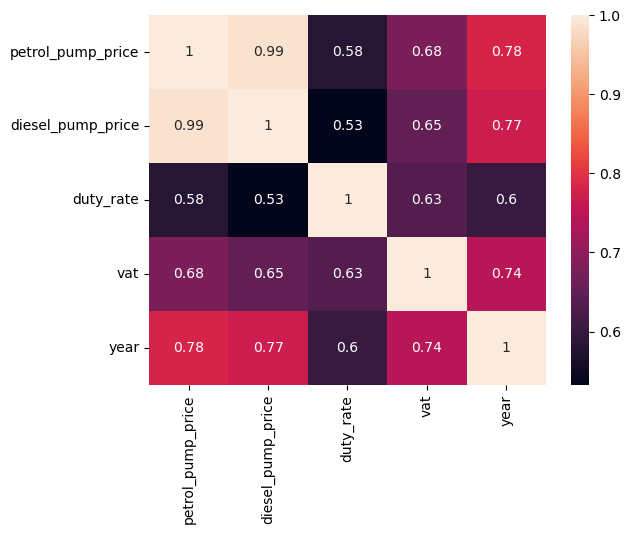

In [126]:
sns.heatmap(corr.corr(), annot = True)

This heat map and the preceding table give an overview of the correlations between the variables. We can see that diesles_pump_price and petrol_pump_price are strongly correlated, suggesting that they follow similar patterns. Another interesting point is that duty_rate is not as strongly correlated to the petrol and diesel prices suggesting that over the years, duty rate has not had a massive impact on petrol and diesel prices.

## Pre-Analysis 

During the analysis I will use another supplemetary dataset containing information of the number of crude oil imports to the UK over a number of years. 

The dataset is available at: https://www.data.gov.uk/dataset/8f8e436d-816a-4c14-a4de-ad1e73774ec7/historical-crude-oil-and-petroleum-data-production-imports-and-exports. 

The download link is http://localhost:8889/files/PROJECT/oil_Imports.csv?_xsrf=2%7C4d9e143b%7C2815f71a20514b55e7889d4e65759ff7%7C1731947822 
The path is PROJECT/oil_Imports.csv. 

Before I analyse using this data I will clean and process it to make sure it is reliable for analysis. 

In [377]:
#import and load the dataset into a data frame 
df_imports = pd.read_csv('oil_imports.csv')

In [379]:
#view a subset of the dataset
df_imports.head()

,Crude oil and petroleum products: Imports by product 1920-2023,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thousand Tonnes
3,NaN,NaN,Crude Oil,NaN,NaN,NaN,NaN,Other Spirits,NaN,NaN,...,Kerosene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Crude oil and process oils,NaN,NaN,Petrol,Aviation spirit,Wide cut gasoline,Industrial spirit,White spirit,...,Aviation turbine fuel (jet),Burning oil,NaN,Gas oil (red diesel),White diesel,Fuel oil,Lubricating oils,Miscellaneous products,Total products,NaN


The same as before has occured where extra, unnecessary information has been added to the dataframe that was not intended to be included in the dataset so I must fix this first.

In [382]:
#use slicing to remove unwanted rows and start the dataset from index 7 
df_imports = df_imports.iloc[5:,:].copy()
df_imports = df_imports.dropna(axis=0, how='all')

In [384]:
#investigate the column titles
df_imports.columns

Index(['Crude oil and petroleum products: Imports by product 1920-2023',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21'],
      dtype='object')

In [386]:
#convert the year column to dtype integer 
df_imports = df_imports.rename(columns = {'Crude oil and petroleum products: Imports by product 1920-2023' : 'year'}) #change the column containing year values to be named 'year' so we can select the data based on this
df_imports['year'] = df_imports['year'].astype(int) #change the dtype of the year column to be integer

In [388]:
#slice the dataframe to only include years that are relevant to the fuel prices dataset
df_imports = df_imports[(df_imports['year'] >= 2003) & (df_imports['year'] <= 2023)]

In [390]:
#remove NaN columns and rows 
df_imports = df_imports.dropna(axis=1, how = 'all')

In [392]:
#get rid of irrelevant columns, we only want the column related to crude oil imports and the year
df_imports = df_imports.iloc[:, :2]
df_imports.columns = ['year', 'crude_oils_imported']
#change the dtype of the data to be numeric so we can aggregate on it and use mathematical operations. 
df_imports['crude_oils_imported'] = pd.to_numeric(df_imports['crude_oils_imported'].str.replace(',', ''))

In [394]:
#reset the index 
df_imports = df_imports.reset_index(drop = True)

In [396]:
#view updated structure
df_imports.head()

,year,crude_oils_imported
0,2003,54177
1,2004,62517
2,2005,58885
3,2006,59443
4,2007,57357


In [398]:
#find the outliers using functions 
def identify_outliers(df, column): #takes a dataframe containing entries for a specific year and the column name 
    upper_limit = df[column].mean() + 3 * df[column].std() #calculates upper limit 
    lower_limit = df[column].mean() - 3 * df[column].std() #calculates lower limit
    outliers = [] #create emtpy list where the outliers will go
    for value in df[column]: #iterates through the values in the selected column of the year-specific DataFrame
            if (value > upper_limit) | (value < lower_limit): 
                outliers.append(value) #adds the iterable value to the outliers list if it's outside of the range of the upper and lower limits
    return outliers #returns the list of outliers 

In [154]:
for year in df_imports['year'].unique(): #iterates through the unique values in the 'Year' column - iterates through each year in the dataset 
    outlier = identify_outliers(df_imports,'crude_oils_imported') #saves a list of the outliers specific to that year and the specified column  to an outlier variable and proceeds to print them.
    print (f"The outliers for year {year} are {outlier}")

The outliers for year 2003 are []
The outliers for year 2004 are []
The outliers for year 2005 are []
The outliers for year 2006 are []
The outliers for year 2007 are []
The outliers for year 2008 are []
The outliers for year 2009 are []
The outliers for year 2010 are []
The outliers for year 2011 are []
The outliers for year 2012 are []
The outliers for year 2013 are []
The outliers for year 2014 are []
The outliers for year 2015 are []
The outliers for year 2016 are []
The outliers for year 2017 are []
The outliers for year 2018 are []
The outliers for year 2019 are []
The outliers for year 2020 are []
The outliers for year 2021 are []
The outliers for year 2022 are []
The outliers for year 2023 are []


There are no outliers so the data is ready to use!

## Analysis 

First I will do generic analysis, not specific to my analysis questions to generate general useful insights. 

<Axes: xlabel='date'>

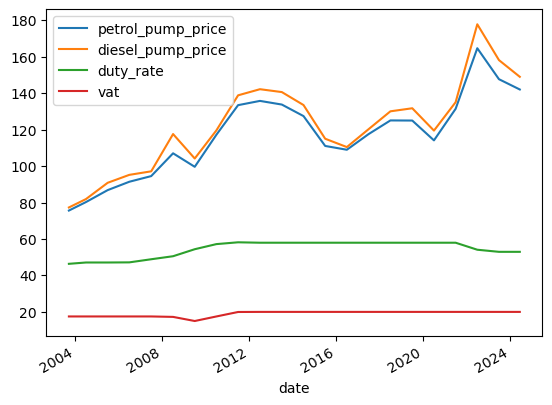

In [159]:
df2 = df.groupby('year')
df2.mean().plot(x = 'date')

This graph shows the general comparison of the mean of the variables for each year and how they have changed overtime. It is clear to see that diesel and eptrol prices have increased since 2003 while duty rate and VAT have stayed relatively constant. We can also see that petrol and diesel follow similar trends but it's difficult to make valuable comparisons. 

In [162]:
df2.median()

,date,petrol_pump_price,diesel_pump_price,duty_rate,vat
year,,,,,
2003,2003-09-18 12:00:00,75.940,77.520,45.82,17.5
2004,2004-07-01 12:00:00,81.110,82.115,47.10,17.5
2005,2005-06-30 12:00:00,86.965,90.635,47.10,17.5
2006,2006-06-29 12:00:00,90.035,94.685,47.10,17.5
2007,2007-07-02 00:00:00,95.710,96.700,48.35,17.5
2008,2008-07-03 12:00:00,107.425,117.285,50.35,17.5
2009,2009-07-02 12:00:00,102.290,103.785,54.19,15.0
2010,2010-07-01 12:00:00,117.335,119.935,57.19,17.5
2011,2011-06-30 12:00:00,134.440,139.770,57.95,20.0


In [164]:
df2.std()

,date,petrol_pump_price,diesel_pump_price,duty_rate,vat
year,,,,,
2003,61 days 14:39:00.165703335,0.691712,0.436367,0.645129,0.000000
2004,106 days 02:00:12.527494378,2.615045,2.887814,0.000000,0.000000
2005,106 days 01:59:57.172034128,4.754137,4.332207,0.000000,0.000000
2006,106 days 01:40:31.156788338,4.150622,2.811984,0.294294,0.000000
2007,108 days 02:08:32.052547838,5.036059,4.928962,0.890198,0.000000
2008,106 days 01:59:57.172034128,8.704303,9.483689,0.595357,0.744196
2009,106 days 01:59:57.172034128,7.444895,3.452486,1.469019,0.000000
2010,106 days 01:59:57.172034128,3.305269,3.860430,0.714006,0.000000
2011,106 days 01:59:57.172034128,2.812885,3.040100,0.425436,0.346688


From the standard deviations we can see that there is a spike in the standard deviation values in 2008 and a larger one in 2022. This means the spread of data in these years in large. This could suggest a major external event which logically makes sense as in 2022 fuel prices could have been impacted by the COVID-19 pandemic or the conflict between Ukraine and Russia as Russia is a nortorious fuel exporter. Additionally, there was a recession in 2008 which may offer an explanation for the spike then.  

In [167]:
df.max()

date                 2024-11-25 00:00:00
petrol_pump_price                 191.55
diesel_pump_price                 199.22
duty_rate                          58.95
vat                                 20.0
year                                2024
dtype: object

In [169]:
df.min()

date                 2003-06-09 00:00:00
petrol_pump_price                  74.21
diesel_pump_price                  76.41
duty_rate                          45.82
vat                                 15.0
year                                2003
dtype: object

First, I will determine whether petrol and diesel prices correlate and follow similar patterns.

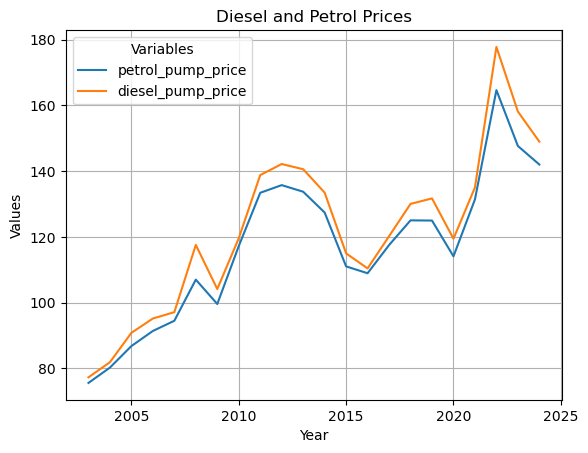

In [172]:
#make a dataframe that contains only the petrol_pump_price, diesel_pump_price and  year columns for ease
df_dvp = df.drop(['date', 'vat', 'duty_rate'], axis = 1).groupby('year').mean()
#plot the two variables so we can visually compare
df_dvp.plot(kind='line')
plt.title('Diesel and Petrol Prices')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(title='Variables')  # Legend for the two lines
plt.grid(True)

In [174]:
#calculate the correlation between the variables so we can  mathematically determine if they follow similar patterns. 
df_dvp.corr()

,petrol_pump_price,diesel_pump_price
petrol_pump_price,1.000000,0.996219
diesel_pump_price,0.996219,1.000000


The correlation coefficient between diesel and petrol prices is 0.99 hence, they are strongly correlated and follow very similar patterns. This is as expected as in the graph we can see they have almost the same shaped distribution.

In [177]:
#make two new columns that calculate the increase/descrease in petrol prices from the week before 
df_dvp['diesel_price_diff'] = df_dvp['diesel_pump_price'].diff()
df_dvp['petrol_price_diff'] = df_dvp['petrol_pump_price'].diff()

<Axes: xlabel='year'>

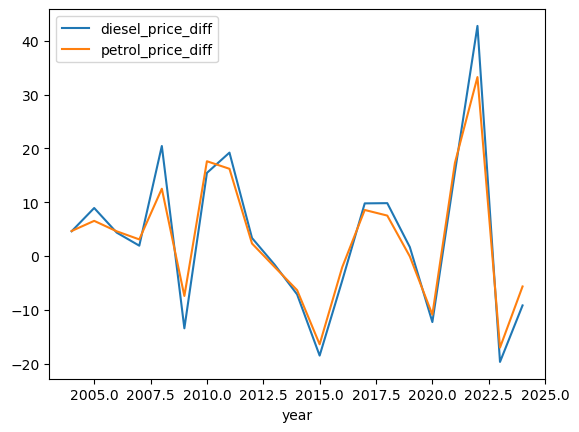

In [179]:
#plot the differences to observe if the petrol and diesel prices fluctuate by similar amounts
df_dvp.plot(y = ['diesel_price_diff', 'petrol_price_diff'])

In [181]:
#confirm this mathematicallty with the correlation coefficients of trhe differences 
df_dvp.corr()

,petrol_pump_price,diesel_pump_price,diesel_price_diff,petrol_price_diff
petrol_pump_price,1.000000,0.996219,0.205723,0.178535
diesel_pump_price,0.996219,1.000000,0.219671,0.180719
diesel_price_diff,0.205723,0.219671,1.000000,0.984095
petrol_price_diff,0.178535,0.180719,0.984095,1.000000


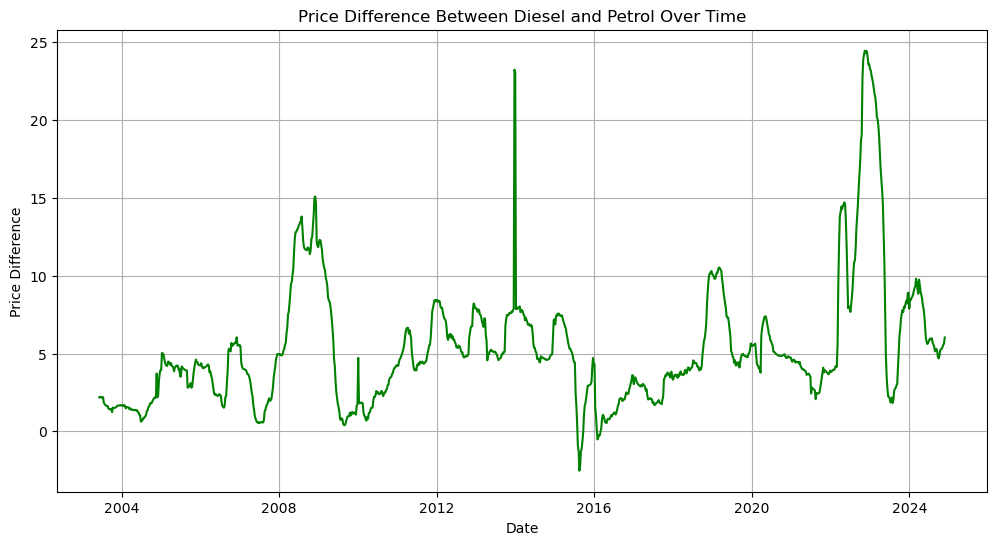

In [183]:
# Calculate the difference between petrol and diesel prices
df['price_difference'] = df['diesel_pump_price'] - df['petrol_pump_price']

# Plot the difference over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['price_difference'], label='Diesel - Petrol Price Difference', color='green')
plt.title('Price Difference Between Diesel and Petrol Over Time')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.grid()
plt.show()

This shows that the price difference between petrol and diesel never goes above 25p, there are spikes in the differences which are likely due to the price of formulation processes or differing supply and demand patterns as diesel is subject to more seasonal demand spikes based on industrial demand whereas petrol is used more for personal vehicles and therefore is subject to spikes in school holidays for example. Despite these spikes in differences, the price differences haven't exceeded 25p since 2003 and so it is clear that they follow fairly similar patterns. From the graph it seems the difference between diesel and petrol prices was larger around 2008 to 2010, again in 2014 and again in 2023. These are likely due to external events such as the Ukraine-Russia conflict in 2023 and the recession in 2008. 

Overall, it is clear that the differences are strongly correlated meaning that the diesel and petrol prices fluctuate in the same pattern consistently. Due to this we can conclude that they follow the same trajectory.

The next analysis question we endeavor to answer is to determine what fuel prices have been driven by. 

To gain more useful insights I will now zoom in and take a closer look at the price changes in a year in order to understand any seasonal trends. It is not appropriate for the purpose of this project to analyse every year in detail so I  will select a sample of 2013, 2018 and 2023 to get a valuable conclusion of cyclical yearly patterns. 

In [314]:
df_2013 = df[df['year'] == 2013].drop('year', axis = 1).copy()
df_2013['month'] = df_2013['date'].dt.month
df_2013_months = df_2013.drop('date', axis = 1).groupby('month')
df_2013_months.agg(['mean', 'std'])

petrol_pump_price           diesel_pump_price           duty_rate       \
                   mean       std              mean       std      mean  std   
month                                                                          
1              132.2550  0.485146          140.0375  0.501556     57.95  0.0   
2              136.3250  1.768719          143.6650  1.559006     57.95  0.0   
3              138.5350  1.416627          145.5550  1.149217     57.95  0.0   
4              136.4120  1.192422          141.7080  1.650551     57.95  0.0   
5              133.3375  0.240607          138.5125  0.232863     57.95  0.0   
6              134.3300  0.214476          139.4450  0.202402     57.95  0.0   
7              135.0140  1.460010          139.8480  1.258479     57.95  0.0   
8              136.9950  0.123962          141.7500  0.064807     57.95  0.0   
9              136.5120  1.758713          141.9120  0.996604     57.95  0.0   
10             131.5600  0.109848          138.9625  0.141745     57.95  0.0   
11             129.8875  0.132759          137.5050  0.165025     57.95  0.0   
12             124.3700  8.612265          138.2880  0.397706     57.95  0.0   

        vat      price_difference           duty_proportion_petrol            \
       mean  std             mean       std                   mean       std   
month                                                                          
1      20.0  0.0           7.7825  0.091788               0.438173  0.001603   
2      20.0  0.0           7.3400  0.214476               0.425141  0.005505   
3      20.0  0.0           7.0200  0.273618               0.418339  0.004278   
4      20.0  0.0           5.2960  0.688934               0.424842  0.003733   
5      20.0  0.0           5.1750  0.055678               0.434612  0.000784   
6      20.0  0.0           5.1150  0.023805               0.431401  0.000689   
7      20.0  0.0           4.8340  0.205012               0.429255  0.004636   
8      20.0  0.0           4.7550  0.134040               0.423008  0.000383   
9      20.0  0.0           5.4000  0.780000               0.424562  0.005561   
10     20.0  0.0           7.4025  0.128679               0.440484  0.000368   
11     20.0  0.0           7.6175  0.049917               0.446156  0.000456   
12     20.0  0.0          13.9180  8.414599               0.467789  0.033228   

      vat_proportion_petrol           duty_proportion_diesel            \
                       mean       std                   mean       std   
month                                                                    
1                  0.151225  0.000553               0.413822  0.001478   
2                  0.146727  0.001900               0.403405  0.004373   
3                  0.144379  0.001476               0.398150  0.003145   
4                  0.146624  0.001288               0.408984  0.004770   
5                  0.149996  0.000271               0.418375  0.000703   
6                  0.148887  0.000238               0.415577  0.000604   
7                  0.148147  0.001600               0.414405  0.003726   
8                  0.145991  0.000132               0.408818  0.000187   
9                  0.146527  0.001919               0.408368  0.002891   
10                 0.152022  0.000127               0.417019  0.000425   
11                 0.153980  0.000157               0.421440  0.000506   
12                 0.161446  0.011468               0.419056  0.001204   

      vat_proportion_diesel            
                       mean       std  
month                                  
1                  0.142820  0.000510  
2                  0.139225  0.001509  
3                  0.137412  0.001085  
4                  0.141151  0.001646  
5                  0.144392  0.000243  
6                  0.143426  0.000208  
7                  0.143022  0.001286  
8                  0.141093  0.000065  
9                  0.140938  0.000998  
10           

In [310]:
df_2018 = df[df['year'] == 2018].drop('year', axis = 1).copy()
df_2018['month'] = df_2018['date'].dt.month
df_2018_months = df_2018.drop('date', axis = 1).groupby('month')
df_2018_months.agg(['mean', 'std'])

petrol_pump_price           diesel_pump_price           duty_rate       \
                   mean       std              mean       std      mean  std   
month                                                                          
1               120.972  0.634484          124.4900  0.752363     57.95  0.0   
2               120.845  1.017530          124.4125  1.011579     57.95  0.0   
3               119.200  0.077460          122.9050  0.050000     57.95  0.0   
4               120.722  1.122016          124.4640  1.230723     57.95  0.0   
5               125.275  1.886275          129.2425  2.039647     57.95  0.0   
6               128.035  0.640547          132.0525  0.583745     57.95  0.0   
7               127.204  0.437870          131.6100  0.465134     57.95  0.0   
8               128.595  0.500966          132.7800  0.371035     57.95  0.0   
9               130.295  0.392980          134.3300  0.478609     57.95  0.0   
10              130.512  0.429616          136.1880  0.946795     57.95  0.0   
11              128.055  1.884719          136.4800  0.769199     57.95  0.0   
12              121.696  1.671057          131.8620  1.626536     57.95  0.0   

        vat      price_difference           duty_proportion_petrol            \
       mean  std             mean       std                   mean       std   
month                                                                          
1      20.0  0.0           3.5180  0.131795               0.479047  0.002513   
2      20.0  0.0           3.5675  0.099121               0.479565  0.004050   
3      20.0  0.0           3.7050  0.098489               0.486158  0.000316   
4      20.0  0.0           3.7420  0.137368               0.480062  0.004454   
5      20.0  0.0           3.9675  0.177271               0.462661  0.006949   
6      20.0  0.0           4.0175  0.078899               0.452619  0.002270   
7      20.0  0.0           4.4060  0.097365               0.455572  0.001572   
8      20.0  0.0           4.1850  0.143411               0.450645  0.001755   
9      20.0  0.0           4.0350  0.116762               0.444763  0.001344   
10     20.0  0.0           5.6760  0.563764               0.444024  0.001463   
11     20.0  0.0           8.4250  1.180325               0.452614  0.006676   
12     20.0  0.0          10.1660  0.099398               0.476258  0.006479   

      vat_proportion_petrol           duty_proportion_diesel            \
                       mean       std                   mean       std   
month                                                                    
1                  0.165331  0.000867               0.465513  0.002817   
2                  0.165510  0.001398               0.465812  0.003800   
3                  0.167785  0.000109               0.471502  0.000192   
4                  0.165681  0.001537               0.465633  0.004599   
5                  0.159676  0.002398               0.448466  0.007068   
6                  0.156210  0.000783               0.438847  0.001944   
7                  0.157229  0.000542               0.440321  0.001562   
8                  0.155529  0.000606               0.436439  0.001219   
9                  0.153499  0.000464               0.431404  0.001540   
10                 0.153244  0.000505               0.425531  0.002968   
11                 0.156208  0.002304               0.424614  0.002401   
12                 0.164369  0.002236               0.439528  0.005380   

      vat_proportion_diesel            
                       mean       std  
month                                  
1                  0.160660  0.000972  
2                  0.160764  0.001311  
3                  0.162727  0.000066  
4                  0.160702  0.001587  
5                  0.154777  0.002439  
6                  0.151457  0.000671  
7                  0.151966  0.000539  
8                  0.150626  0.000421  
9                  0.148888  0.000532  
10           

In [316]:
df_2023 = df[df['year'] == 2023].drop('year', axis = 1).copy()
df_2023['month'] = df_2023['date'].dt.month
df_2023_months = df_2023.drop('date', axis = 1).groupby('month')
df_2023_months.agg(['mean', 'std'])

petrol_pump_price           diesel_pump_price           duty_rate       \
                   mean       std              mean       std      mean  std   
month                                                                          
1              149.2100  1.190693          172.0760  1.539896     52.95  0.0   
2              147.9325  0.326535          169.4700  0.749489     52.95  0.0   
3              146.7300  0.405051          166.4525  0.961158     52.95  0.0   
4              145.8275  0.086168          162.4675  1.000279     52.95  0.0   
5              144.4480  1.149596          154.6920  5.015687     52.95  0.0   
6              142.9975  0.306309          145.6900  0.527067     52.95  0.0   
7              143.2260  0.559670          145.1940  0.548662     52.95  0.0   
8              148.5200  1.974555          151.0650  2.287859     52.95  0.0   
9              153.5700  1.560577          157.3925  2.582407     52.95  0.0   
10             155.1300  0.872554          162.1800  0.269444     52.95  0.0   
11             151.0200  2.315211          158.9675  2.133344     52.95  0.0   
12             142.8375  2.396350          151.4325  2.110598     52.95  0.0   

        vat      price_difference           duty_proportion_petrol            \
       mean  std             mean       std                   mean       std   
month                                                                          
1      20.0  0.0          22.8660  0.368551               0.354887  0.002822   
2      20.0  0.0          21.5375  0.424608               0.357935  0.000790   
3      20.0  0.0          19.7225  0.557218               0.360869  0.000997   
4      20.0  0.0          16.6400  1.063986               0.363100  0.000215   
5      20.0  0.0          10.2440  3.868660               0.366587  0.002923   
6      20.0  0.0           2.6925  0.612774               0.370287  0.000792   
7      20.0  0.0           1.9680  0.163615               0.369700  0.001440   
8      20.0  0.0           2.5450  0.339657               0.356565  0.004746   
9      20.0  0.0           3.8225  1.056736               0.344821  0.003505   
10     20.0  0.0           7.0500  0.695162               0.341335  0.001922   
11     20.0  0.0           7.9475  0.219298               0.350678  0.005410   
12     20.0  0.0           8.5950  0.348855               0.370779  0.006205   

      vat_proportion_petrol           duty_proportion_diesel            \
                       mean       std                   mean       std   
month                                                                    
1                  0.134046  0.001066               0.307733  0.002746   
2                  0.135197  0.000298               0.312449  0.001382   
3                  0.136306  0.000377               0.318117  0.001842   
4                  0.137148  0.000081               0.325921  0.002005   
5                  0.138465  0.001104               0.342584  0.011207   
6                  0.139863  0.000299               0.363446  0.001312   
7                  0.139641  0.000544               0.364689  0.001377   
8                  0.134680  0.001793               0.350572  0.005326   
9                  0.130244  0.001324               0.336488  0.005502   
10                 0.128927  0.000726               0.326490  0.000543   
11                 0.132456  0.002044               0.333132  0.004496   
12                 0.140049  0.002344               0.349712  0.004857   

      vat_proportion_diesel            
                       mean       std  
month                                  
1                  0.116235  0.001037  
2                  0.118017  0.000522  
3                  0.120157  0.000696  
4                  0.123105  0.000757  
5                  0.129399  0.004233  
6                  0.137279  0.000496  
7                  0.137748  0.000520  
8                  0.132416  0.002012  
9                  0.127096  0.002078  
10           

By comparison of these tables, it's clear that VAT and Duty Rates stay level throughout a year usually.

### 2013 Fluctuations
In 2013, the prices for petrol and diesel both increase at the start of the year then deacrease in month 4 and 5 and then increase again, but overall from start to end the there is a decrease by 1.85p for petrol and 1.75 for diesel.

### 2018 Fluctuations
In 2018, the pattern is different. The prices decrease at the start of the year and fluctuate regularly bu the whole year sees a general increase by 0.72p for petrol and a significant 7.37p for diesel.

### 2023 Fluctuations
In 2023, the year begins with a price decrease for both which remains nuntil June then there's a spike but overall the year saw a decrease of 6.37p for petrol and 20.64p for diesel.

These comparions would suggest that there is no real seasonal pattern that all the years follow, there is irregular fluctuation throughout each year. This suggests that there is no influence of seasonality upon the price of petrol and diesel. The lack of common seasonal trends are better represented on the following graphs.

This is easier to understand visually:

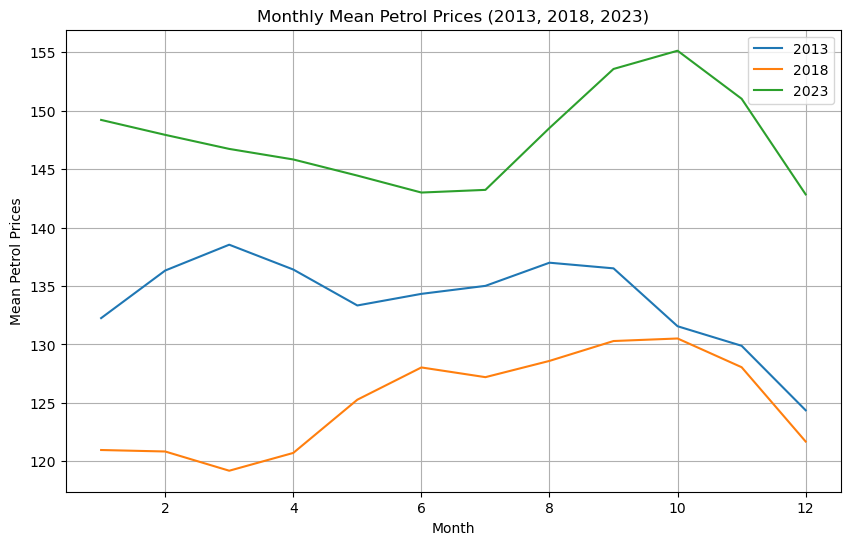

In [197]:
# demonstrate for petrol prices 
monthly_mean_p2013 = df_2013_months['petrol_pump_price'].mean()
monthly_mean_p2018 = df_2018_months['petrol_pump_price'].mean()
monthly_mean_p2023 = df_2023_months['petrol_pump_price'].mean()
monthly_mean_p2013.plot(label='2013', figsize=(10, 6))
monthly_mean_p2018.plot(label='2018')
monthly_mean_p2023.plot(label='2023')
plt.xlabel('Month')
plt.ylabel('Mean Petrol Prices')
plt.title('Monthly Mean Petrol Prices (2013, 2018, 2023)')
plt.legend()
plt.grid(True)
plt.show()

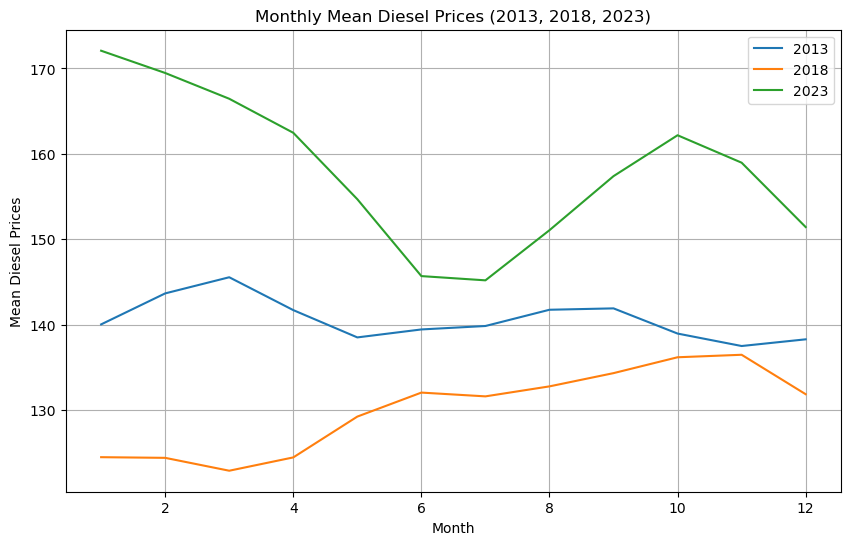

In [199]:
#demonstrate for diesel prices 
monthly_mean_d2013 = df_2013_months['diesel_pump_price'].mean()
monthly_mean_d2018 = df_2018_months['diesel_pump_price'].mean()
monthly_mean_d2023 = df_2023_months['diesel_pump_price'].mean()
monthly_mean_d2013.plot(label='2013', figsize=(10, 6))
monthly_mean_d2018.plot(label='2018')
monthly_mean_d2023.plot(label='2023')
plt.xlabel('Month')
plt.ylabel('Mean Diesel Prices')
plt.title('Monthly Mean Diesel Prices (2013, 2018, 2023)')
plt.legend()
plt.grid(True)
plt.show()

You can see that there are no clear consistencies in the behaviour of diesel and petrol prices in different years hence we cannot conclude seasonality is a influential factor. 
However, it's important to note that there may be seasonal trends in years that are close to each other for example 2021 and 2022 may have similar yearly trends, lets investigate this: 

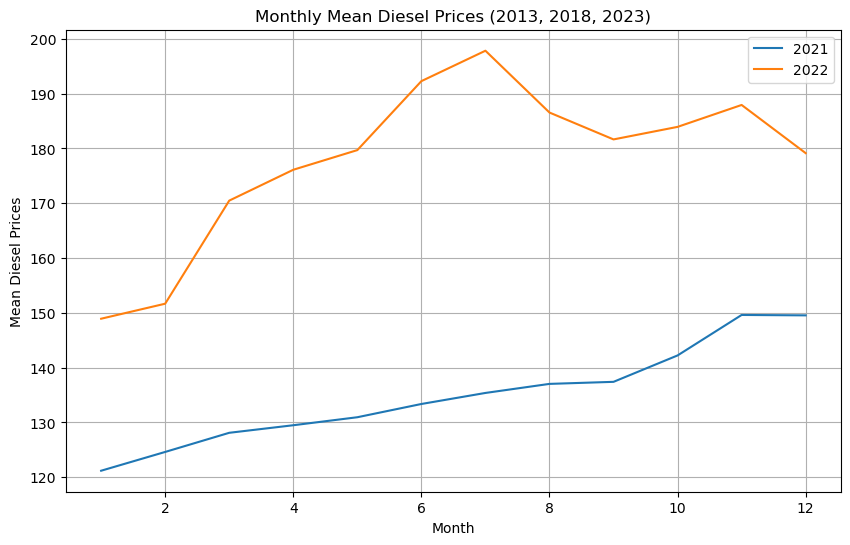

In [405]:
df_2021 = df[df['year'] == 2021].drop('year', axis = 1).copy()
df_2021['month'] = df_2021['date'].dt.month
df_2021_months = df_2021.drop('date', axis = 1).groupby('month')
df_2022 = df[df['year'] == 2022].drop('year', axis = 1).copy()
df_2022['month'] = df_2022['date'].dt.month
df_2022_months = df_2022.drop('date', axis = 1).groupby('month')
#demonstrate for diesel prices 
monthly_mean_d2021 = df_2021_months['diesel_pump_price'].mean()
monthly_mean_d2022 = df_2022_months['diesel_pump_price'].mean()
monthly_mean_d2021.plot(label='2021', figsize=(10, 6))
monthly_mean_d2022.plot(label='2022')
plt.xlabel('Month')
plt.ylabel('Mean Diesel Prices')
plt.title('Monthly Mean Diesel Prices (2013, 2018, 2023)')
plt.legend()
plt.grid(True)
plt.show()

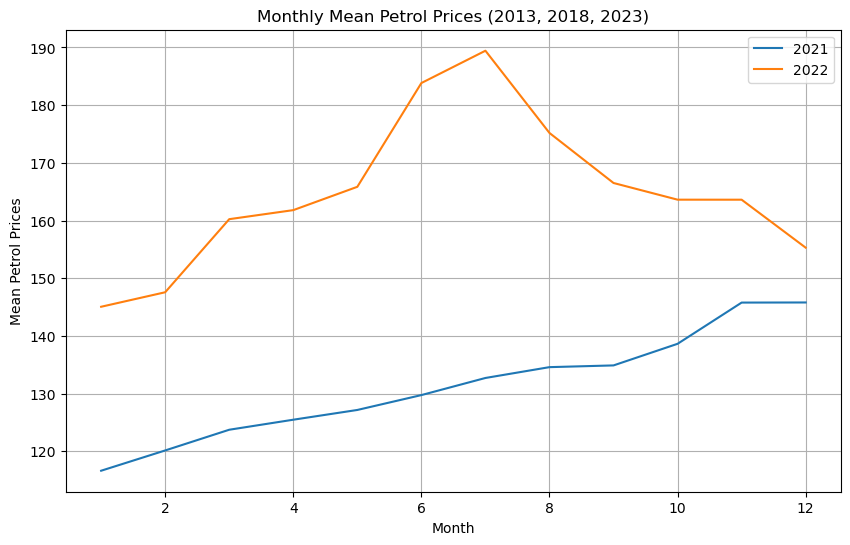

In [409]:
#demonstrate for petrol prices 
monthly_mean_d2021 = df_2021_months['petrol_pump_price'].mean()
monthly_mean_d2022 = df_2022_months['petrol_pump_price'].mean()
monthly_mean_d2021.plot(label='2021', figsize=(10, 6))
monthly_mean_d2022.plot(label='2022')
plt.xlabel('Month')
plt.ylabel('Mean Petrol Prices')
plt.title('Monthly Mean Petrol Prices (2013, 2018, 2023)')
plt.legend()
plt.grid(True)
plt.show()

It again is clear there is no cyclical similarities so we can with certainty conclude that seasonality does not impact fuel prices.

Now that we have concluded the petrol prices do not depend on seasonality we can use the supplementary Crude Oil Imports dataset to understand the impact of crude oil imports on petrol prices and see if there is correlation between the two.

First, lets understand the relationships of the variables in the prices dataset to each other.

In [204]:
df_prices = df.iloc[:-1].drop(columns=['date']).groupby('year')

<Axes: >

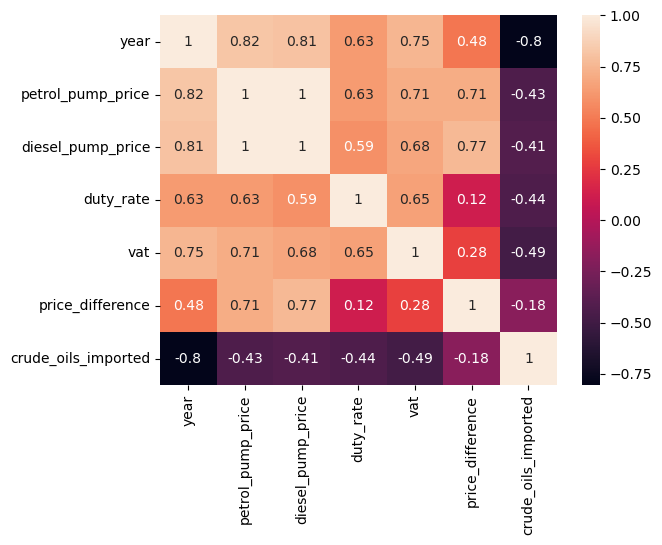

In [206]:
#join the crude oils dataset and see correlations between the variables
merged_df = pd.merge(df_prices.mean(), df_imports, on='year', how='left')
merged_df.corr()
sns.heatmap(merged_df.corr(), annot = True)

The correlation coefficient of crude oil imports and petrol prices is -0.46 and with diesel prices is -0.44 showing there is a slight negative correlation between them meaning if crude oil imports decreases, the price of petrol and diesel increases. However, there is not a strong correlation so there may be other factors such as refinery production, capacity, exchange rates, or retailer margins that are outside the scope of these datasets that impact the price. Despite this, we can still conclude a relationship between crude oil imports and petrol/diesel prices. It is not appropriate to conclude crude oil imports impact price volatility as the correlation is not strong enough. 

Another interest point for analysis could be to investigate further how government has used duty rate to reguate fuel prices as the correlation coefficient we mentioned earlier suggested that duty rate isn't very strongly correlated to diesel or petrol prices.. 

In [210]:
#make a new dataframe that contains only the relevant data 
df_gov = df[['year', 'date', 'duty_rate', 'vat', 'petrol_pump_price', 'diesel_pump_price']]

In [212]:
#create a new column that is the difference in the duty rate compared to the last week 
df_gov['duty_diff'] = df_gov['duty_rate'].copy().diff()
df_gov.groupby('year').mean()

,date,duty_rate,vat,petrol_pump_price,diesel_pump_price,duty_diff
year,,,,,,
2003,2003-09-18 12:48:00.000000000,46.374667,17.500000,75.592000,77.288000,0.044138
2004,2004-07-01 12:55:23.076923136,47.100000,17.500000,80.254808,81.893462,0.000000
2005,2005-06-30 12:00:00.000000000,47.100000,17.500000,86.796923,90.820385,0.000000
2006,2006-06-29 12:27:41.538461568,47.172115,17.500000,91.395192,95.178462,0.024038
2007,2007-07-02 00:27:10.188679168,48.878302,17.500000,94.494717,97.112075,0.037736
2008,2008-07-03 12:00:00.000000000,50.542308,17.259615,107.001154,117.557115,0.038462
2009,2009-07-02 12:00:00.000000000,54.383846,15.000000,99.593846,104.146923,0.073846
2010,2010-07-01 12:00:00.000000000,57.190000,17.500000,117.204231,119.592308,0.038462
2011,2011-06-30 12:00:00.000000000,58.180769,19.951923,133.413269,138.805385,-0.004615


<Axes: xlabel='year', ylabel='duty rate'>

<Figure size 1200x3000 with 0 Axes>

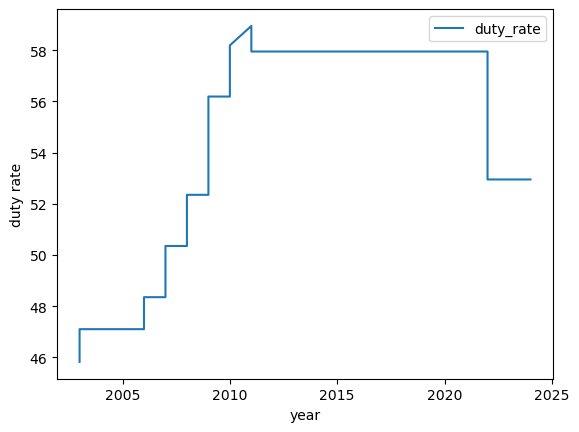

In [214]:
#plot the duty rate to understand when and how it has changed 
plt.figure(figsize=(12, 30))
df_gov.plot(y = 'duty_rate', x = 'year', ylabel = 'duty rate')

This graph shows the pattern that duty rate has followed since 2003. It gradually increased until 2011 and then decreased slightly and remained consistent until 2022 and then it decreased again. The decrease in 2022 appropriately follows the large spike in prices in 2021/2022 so it could be argued that this was an act of price regulation however we cannot be certain. 

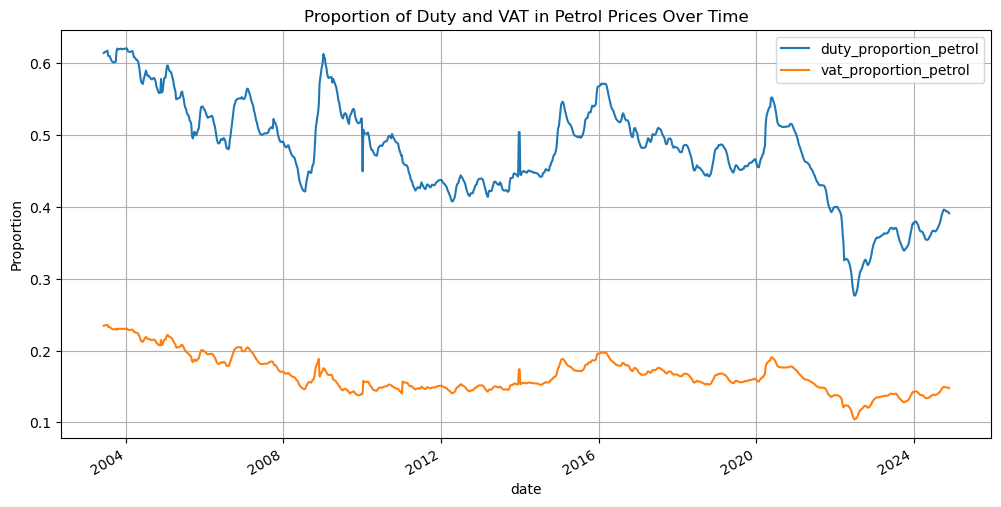

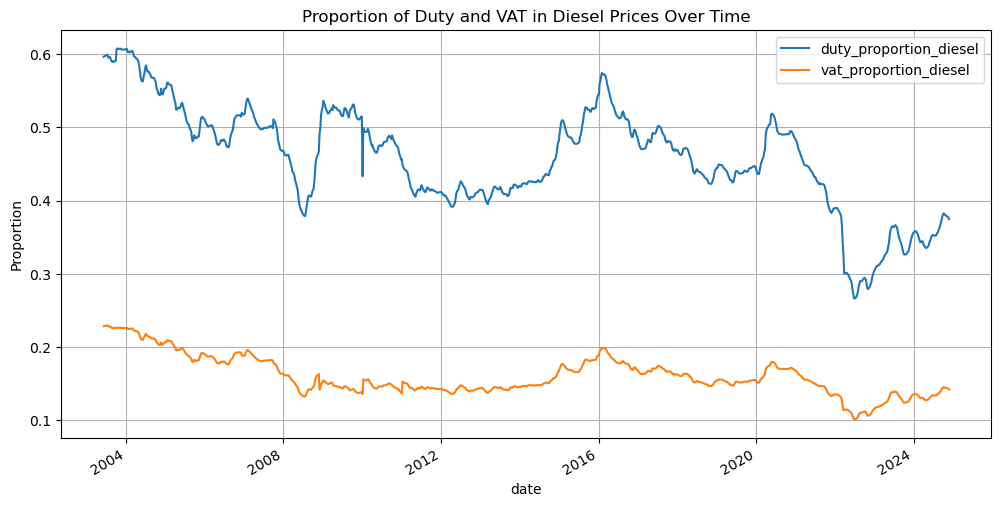

In [217]:
# Create new columns for proportions
df['duty_proportion_petrol'] = df['duty_rate'] / df['petrol_pump_price']
df['vat_proportion_petrol'] = df['vat'] / df['petrol_pump_price']
df['duty_proportion_diesel'] = df['duty_rate'] / df['diesel_pump_price']
df['vat_proportion_diesel'] = df['vat'] / df['diesel_pump_price']
# Plot proportions
df[['date', 'duty_proportion_petrol', 'vat_proportion_petrol']].set_index('date').plot(figsize=(12, 6))
plt.title('Proportion of Duty and VAT in Petrol Prices Over Time')
plt.ylabel('Proportion')
plt.grid()
plt.show()
df[['date', 'duty_proportion_diesel', 'vat_proportion_diesel']].set_index('date').plot(figsize=(12, 6))
plt.title('Proportion of Duty and VAT in Diesel Prices Over Time')
plt.ylabel('Proportion')
plt.grid()
plt.show()

These graph shows the proportion of the petrol and diesel prices that came from duty rates over the years. Again, there is a clear dip around 2022 hence we can see that the decrease in duty rate at this time had an impact on the overall fuel prices, more so in diesel prices than in petrol prices. This is more evidence of government success in regulating price volatility.

Now we will zoom in to analyse the impact of changing duty rates on a short term basis. I will use the same years as before for reference (2013, 2018 and 2023).

<Axes: xlabel='date'>

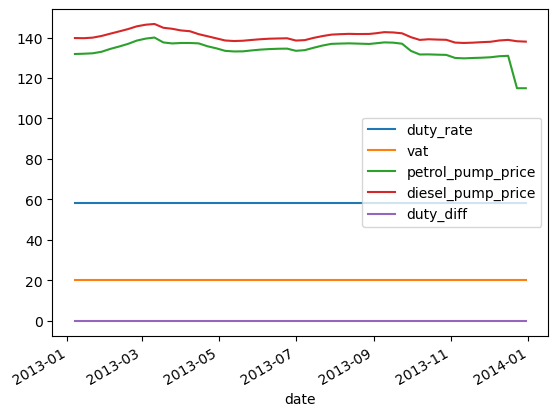

In [221]:
df_gov_2013 = df_gov[df_gov['year'] == 2013]
df_gov_2013.drop('year', axis = 1).plot(x = 'date')

<Axes: xlabel='date'>

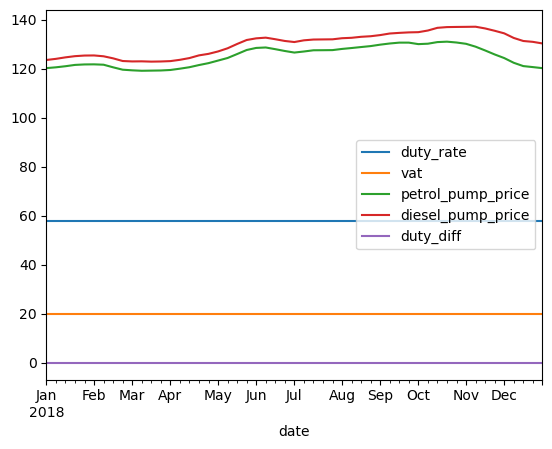

In [223]:
df_gov_2018 = df_gov[df_gov['year'] == 2018]
df_gov_2018.drop('year', axis = 1).plot(x = 'date')

<Axes: xlabel='date'>

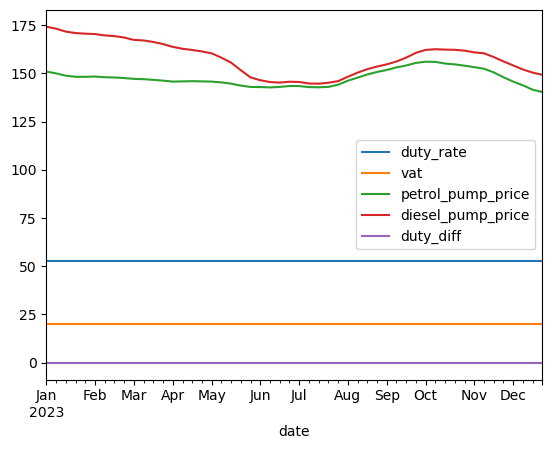

In [224]:
df_gov_2023 = df_gov[df_gov['year'] == 2023]
df_gov_2023.drop('year', axis = 1).plot(x = 'date')

These graphs show that duty rate remains level throughout the year generally so do not have short term influence on fuel prices.

If we look broadly at the duty rate data:

In [229]:
correlation_petrol = df['duty_rate'].corr(df['petrol_pump_price'])
correlation_diesel = df['duty_rate'].corr(df['diesel_pump_price'])
print(f"Correlation between duty rate and petrol prices: {correlation_petrol}")
print(f"Correlation between duty rate and diesel prices: {correlation_diesel}")

Correlation between duty rate and petrol prices: 0.5803128289831541
Correlation between duty rate and diesel prices: 0.5324843664297959


It seems as though duty rate may not have been so influential in the past. However, taking a closer look we can see evidence of potential government intervantion during 2022 to regulate prices. 
It is inappropriate to draw solid conclusions from this though as duty rate can be changed by the government for more reasons than just price regulation. They may have changed the duty rate for environmental reasons, inflation adjustment, consumption regulation and many more hence it would require more investigation to draw a conclusion. On the whole, there is little evidence to suggest that the government have successfully adjusted duty rate to mitigate price volatility.

## Key Finding Visualisations

To go back to our analysis questions we have some key findings and conclusions that can be visualised for ease of comprehension. 

### Petrol Prices and Diesel Prices follow similar patterns and have similar distributions. 

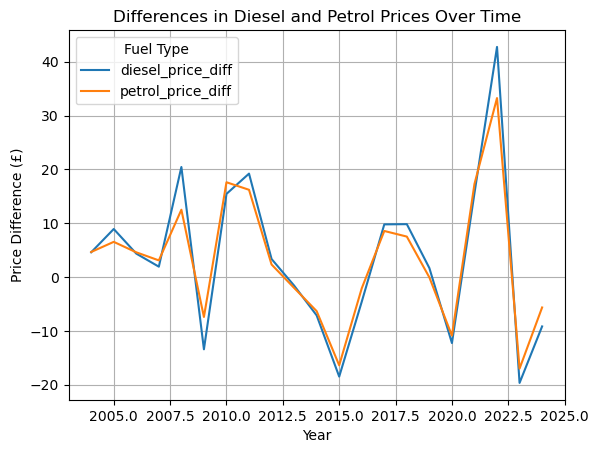

In [235]:
df_dvp.plot(y=['diesel_price_diff', 'petrol_price_diff'])
plt.title('Differences in Diesel and Petrol Prices Over Time')
plt.xlabel('Year')  
plt.ylabel('Price Difference (£)')
plt.legend(title='Fuel Type')
plt.grid(True)
plt.show()

This shows that the fluctuations in prices for both petrol and diesel are very similar and hence we can conclude that they follow the same patterns.

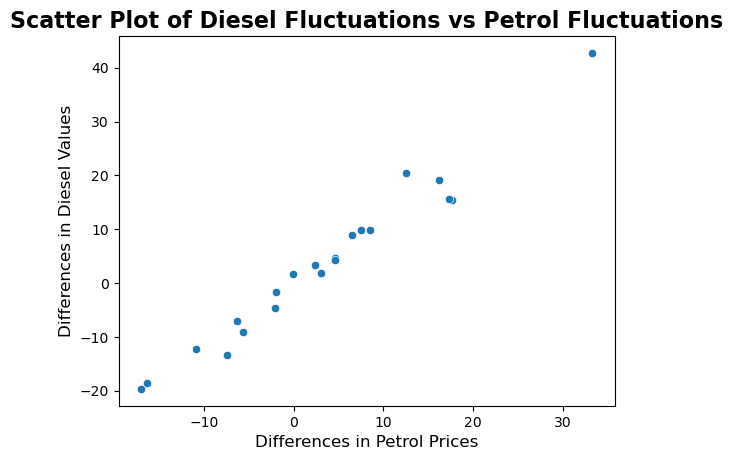

In [238]:
sns.scatterplot(x='petrol_price_diff', y='diesel_price_diff', data=df_dvp) 
plt.title('Scatter Plot of Diesel Fluctuations vs Petrol Fluctuations', fontsize=16, fontweight='bold')  # Title
plt.xlabel('Differences in Petrol Prices', fontsize=12)  # X-axis label
plt.ylabel('Differences in Diesel Values', fontsize=12)  # Y-axis label

plt.show()

This shows the differences are directly proportional to each other, further confirming the conclusion.

### Fuel Price Changes aren't impacted by seasonality

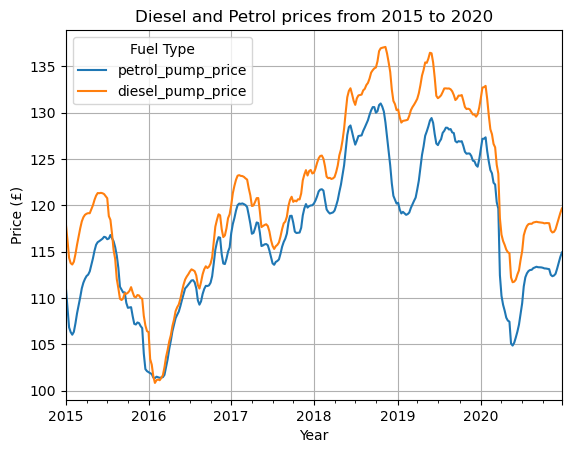

In [242]:
df_10 = df[(df['year'] >= 2015) & (df['year'] <= 2020)]
df_10.plot(x = 'date', y = ['petrol_pump_price', 'diesel_pump_price'])
plt.title('Diesel and Petrol prices from 2015 to 2020')
plt.xlabel('Year')  
plt.ylabel('Price (£)')
plt.legend(title='Fuel Type')
plt.grid(True)
plt.show()

Over these 5 years you can see no repeating patterns within a year hence we can conclude, there are no regular seasons trends that impact fuel prices.

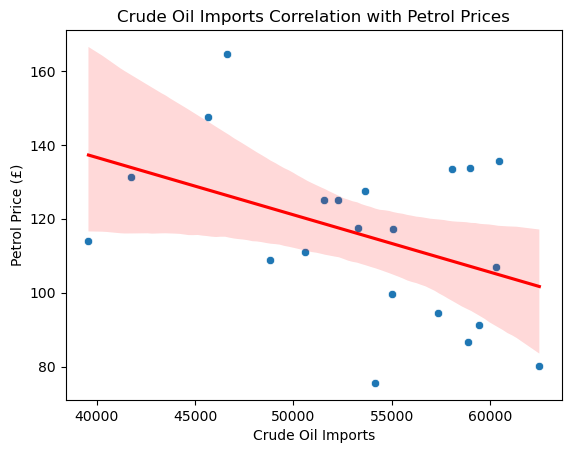

In [251]:
sns.scatterplot(x='crude_oils_imported', y='petrol_pump_price', data=merged_df)
sns.regplot(x='crude_oils_imported', y='petrol_pump_price', data=merged_df, scatter=False, color='red')
plt.title('Crude Oil Imports Correlation with Petrol Prices')
plt.xlabel('Crude Oil Imports')  
plt.ylabel('Petrol Price (£)')
plt.show()

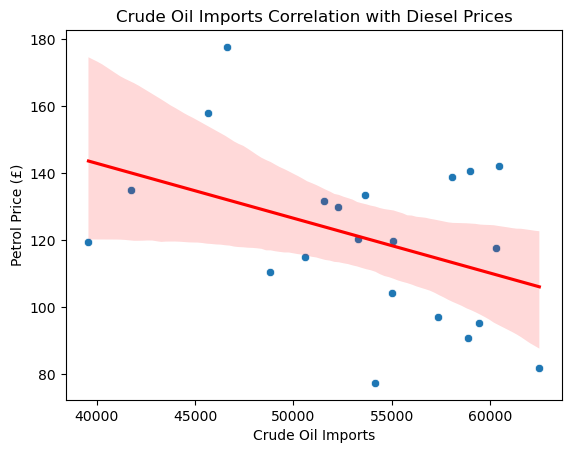

In [253]:
sns.scatterplot(x='crude_oils_imported', y='diesel_pump_price', data=merged_df)
sns.regplot(x='crude_oils_imported', y='diesel_pump_price', data=merged_df, scatter=False, color='red')
plt.title('Crude Oil Imports Correlation with Diesel Prices')
plt.xlabel('Crude Oil Imports')  
plt.ylabel('Petrol Price (£)')
plt.show()

These graphs show correlation between crude oil imports and fuel prices however, it is not strong so we cannot be certain that crude oil imports are having a definite impact on prices. Further investigation into influencing factors could be useful in understanding what drives fuel price volatility. 

<Axes: >

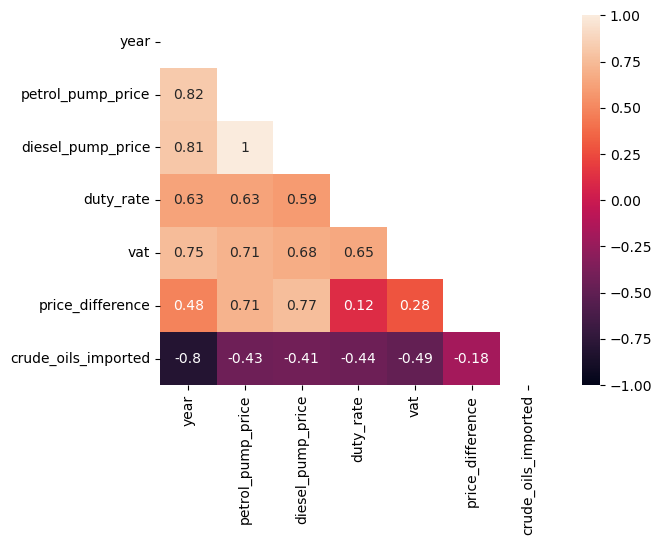

In [256]:
corr = merged_df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(merged_df.corr(),mask = mask , vmax = 1.0, vmin= -1.0, annot = True)

The heatmap confirms that the correlation between crude oil imports and diesel/petrol pump prices is weak. 

## Conclusions and Recommendations 


The main findings of this project are firstly that diesel and petrol prices follow the same patterns and tend to increase or decrease at the same rates. Seconly, there seems to be no seasonal impact on fuel price changes, the fluctuations throughout a year seem to be random and non-cyclical. 
A more actionable conclusion is that there is limited evidence to suggest the government have been successful in altering the duty rate in response to price fluctuations. The government could make a bigger effort to regulate the fuel prices in the UK to reduce financial burden for consumers. This is particularly relevant following or building up to external events. For example, when there is an anticipated spike due to related factors such as conflict, pandemics, or more simply crude oil prices, the government could be more responsive with the duty rate to try and level out the price volatility and reduce the number of spikes and drops or atleast make them less significant. 
It is important however, to understand that these findings are limited in terms of the real life implications. There may be an array of reasons why the government are unable to change duty rates as quickly and freely as what seems appropriate. The government could realistically work to introduce a process that can be more reactive to prices. Duty rates would be much more influential on the prices if they regulated it more frequently. They could decide on a threshold of increase or decrease at which they will evaluate and alter the duty rate to keep the prices within a certain threshold. 
From the data, an appropriate threshold may be to reavaluate when the prices become 3 standard deviations away from the mean for that year. If this threshold is achieved it may be worth lowering or increasing the duty rate promtly to rectify more short-term fluctuations. 
This is only realistic if they can execute the alteration process quickly and get the rate change verified or confirmed by whomever needed in a timely fashion so the price does not deviate further away from the mean. Additionally, further investigation to the cause of price volatility in fuel prices would be helpful so that the regulation of influencing factors can come into play when justifying a duty rate change. 

## Methodology

For the analysis of this dataset, simple aggregations would not be appropriate hence why I have opted for lots of filtering and aggregations on a yearly basis and even on a monthly basis. The problem here is that with the data spanning from 2003 to 2024 it would be overwhelming to analyse the patterns and changes and perform analysis within every single year. It would have been hard to draw conclusions as every year shows different patterns and so I had to simplify and take samples of the data to answer my analysis questions. If there was more time it may have been more insigtful to split the data into separate dataframes for each year. Additionally, it would have been useful to have more surrounding data included in the analysis so we could more knowingly determine the cause of fluctuations. Another way my analysis could be improved is to study the response of prices to crude oil imports with a lag included to see if the impact may have been delayed hence why we didn't see a huge correlation in this analysis. 
In terms of my methods, I often used the groupby function to aggregate yearly and I used lots of visualisations as I feel this was the easiest way to understand the data. I also did not consider all factors during every stage of the analysis in fact VAT was hardly considered as I know the changes to VAT are less directly driven by the prices and so I thought duty rate was a better variable to focus on. 
My general methods used Pandas to clean and select the relevant data and NumPy was used to handle missing values. The analysis used Pandas filtering and aggregations, while using Matplotlib and Seaborn for visualisations for better comprehension of the findings. 